In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
from data.research_data import getData

SEED = 1
player_acc_dict, games_count_dictionary = getData()
player_acc_dict

{'Agrest, Inna': [0.5392156862745098, 0.5454545454545454, 0.5277777777777778],
 'Melia, Salome': [0.508, 0.4767025089605735, 0.5475113122171946],
 'Bashkite, Viktoria': [0.3626373626373626,
  0.38636363636363635,
  0.3404255319148936],
 'Molchanova, Tatjana': [0.46206896551724136,
  0.49673202614379086,
  0.4233576642335766],
 'Danielian, Elina': [0.45985401459854014,
  0.48372093023255813,
  0.4336734693877551],
 'Rogule, Laura': [0.41297935103244837,
  0.39603960396039606,
  0.43795620437956206],
 'Dushinok, Anna': [0.3611111111111111, 0.3611111111111111, -1],
 'Burtasova, Anna': [0.49818181818181817,
  0.6301369863013698,
  0.4504950495049505],
 'Gaponenko, Inna': [0.5, 0.5144927536231884, 0.47560975609756095],
 'Kludacz, Magdalena': [0.42424242424242425, -1, 0.42424242424242425],
 'Gavasheli, Ana': [0.47865853658536583,
  0.45185185185185184,
  0.49740932642487046],
 'Socko, Monika': [0.4634760705289673,
  0.4233128834355828,
  0.49145299145299143],
 'Grabuzova, Tatiana': [0.414473

In [3]:
player_embeddings = {}
for player in player_acc_dict.keys():
  acc_data = player_acc_dict[player][1:]
  if (acc_data[1] > -1) and (acc_data[0] > -1):
    player_embeddings[player] = acc_data

df = pd.DataFrame(list(player_embeddings.values()), columns=['white acc', 'black acc'])
df

,white acc,black acc
0,0.545455,0.527778
1,0.476703,0.547511
2,0.386364,0.340426
3,0.496732,0.423358
4,0.483721,0.433673
...,...,...
69,0.471795,0.433628
70,0.527607,0.422222
71,0.474227,0.521739
72,0.405941,0.548387


In [4]:
def getRangeIdx(num):
  if .30 <= num < .38:
    return 0
  if .38 <= num < .46:
    return 1
  if .46 <= num < .54:
    return 2
  if .54 <= num < .62:
    return 3
  if .62 <= num < .71:
    return 4
  else:
    print(num)

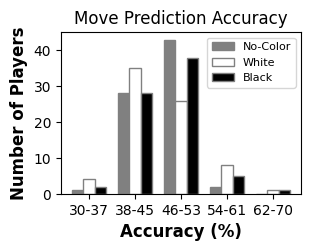

In [5]:
barWidth = 0.25
figWidth, figHeight = 3.1, 2.1

fig = plt.subplots(figsize=(figWidth, figHeight))

# set height of bar
NC = [0, 0, 0, 0, 0]
BLACK = [0, 0, 0, 0, 0]
WHITE = [0, 0, 0, 0, 0]
 
for acc_data in player_acc_dict.values():
  if (acc_data[1] > -1) and (acc_data[2] > -1):
    NC[getRangeIdx(acc_data[0])] += 1
    BLACK[getRangeIdx(acc_data[1])] += 1
    WHITE[getRangeIdx(acc_data[2])] += 1

# Set position of bar on X axis
br1 = np.arange(len(NC))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, NC, color ='gray', width = barWidth,
        edgecolor ='grey', label ='No-Color')
plt.bar(br2, WHITE, color ='white', width = barWidth,
        edgecolor ='grey', label ='White')
plt.bar(br3, BLACK, color ='black', width = barWidth,
        edgecolor ='grey', label ='Black')

 
# Adding Xticks
plt.title("Move Prediction Accuracy")
plt.xlabel('Accuracy (%)', fontweight ='bold', fontsize = 12)
plt.ylabel('Number of Players', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(NC))],
        ['30-37', '38-45', '46-53', '54-61', '62-70'])
 
plt.legend(fontsize=8)
plt.show()

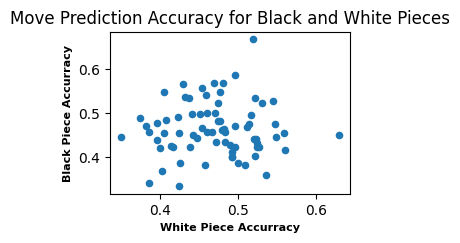

In [6]:
df.plot.scatter(x='white acc', y='black acc', figsize=(figWidth, figHeight))
plt.xlabel('White Piece Accurracy', fontweight ='bold', fontsize = 8)
plt.ylabel('Black Piece Accurracy', fontweight ='bold', fontsize = 8)
plt.title('Move Prediction Accuracy for Black and White Pieces')
plt.show()

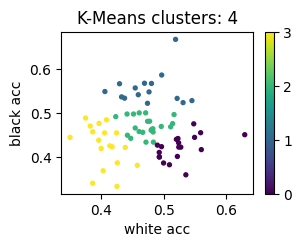

<Figure size 640x480 with 0 Axes>

In [7]:
from sklearn.cluster import KMeans
k = 4
y_kmeans = KMeans(n_clusters=k, random_state=21).fit_predict(df.to_numpy())
cmap = 'viridis'
df.plot.scatter(x='white acc', y='black acc',c=y_kmeans, cmap=cmap, figsize=(figWidth, figHeight), s=8)
plt.title('K-Means clusters: '+str(k))
plt.figure()

plt.show()

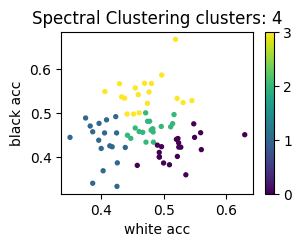

In [8]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='discretize', random_state=1)
labels = model.fit_predict(df.to_numpy())
df.plot.scatter(x='white acc', y='black acc', c=labels, cmap=cmap, figsize=(figWidth, figHeight), s=8)
plt.title('Spectral Clustering clusters: '+ str(k))
plt.show()


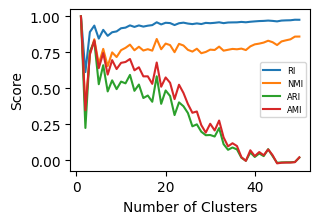

In [9]:
from sklearn.metrics import rand_score, mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score, normalized_mutual_info_score
df_scores = pd.DataFrame(columns=['RI', 'NMI', 'ARI', 'AMI'])
for i in range (1, 51):
  y_kmeans = KMeans(n_clusters=i, random_state=21).fit_predict(df.to_numpy())
  model = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', assign_labels='discretize', random_state=1)
  labels = model.fit_predict(df.to_numpy())
  df_scores.loc[len(df_scores.index)+1] = [
    rand_score(labels_pred=labels, labels_true=y_kmeans), normalized_mutual_info_score(labels_pred=labels, labels_true=y_kmeans),
    adjusted_rand_score(labels_pred=labels, labels_true=y_kmeans), adjusted_mutual_info_score(labels_pred=labels, labels_true=y_kmeans)
  ] 
df_scores.plot.line(figsize=(figWidth, figHeight), ylabel='Score', xlabel='Number of Clusters').legend(fontsize=6)

In [10]:
from numpy.linalg import norm

def getCosineSim(a, b):
  return np.dot(a,b)/(norm(a)*norm(b))

similarities = []
for player1 in player_embeddings.keys():
  player1_embedding = player_embeddings[player1]
  player1_similarities = []
  for player2 in player_embeddings.keys():
    player2_embedding = player_embeddings[player2]
    player1_similarities.append(getCosineSim(player1_embedding, player2_embedding))
  similarities.append(player1_similarities)
similarities = np.array(similarities)
similarities.shape


(74, 74)

In [11]:
def getGraph(number_of_nodes, sim, threshold):
  a = np.ones(sim.shape, dtype=float)
  ## hyper parameter 
  a[sim < threshold] = 0
  a = a - np.identity(number_of_nodes)
  return a

In [12]:
n = similarities.shape[0]
A_9999 = getGraph(n, sim=similarities, threshold=0.9999)
A_9992 = getGraph(n, sim=similarities, threshold=0.9992)
A_997 = getGraph(n, sim=similarities, threshold=0.997)


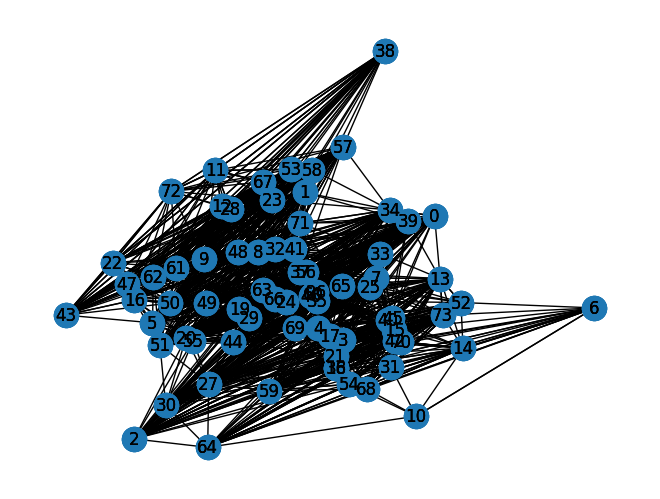

In [13]:
def getGraphFromAdj(a):
  g = nx.from_numpy_array(a)
  pos = {}
  i = 0
  for coords in df.to_numpy():
    pos[i] = coords[:2]
    i += 1
  nx.draw(g, with_labels=True, pos=pos)
  return g, pos
  
G_9999, pos_9999 = getGraphFromAdj(A_9999)
G_9992, pos_9992 = getGraphFromAdj(A_9992)
G_997, pos_997 = getGraphFromAdj(A_997)

In [14]:
import networkx.algorithms.community as nx_comm
def getCommunities(g, n):
  communities_louvain = nx_comm.louvain_communities(g, seed=SEED, resolution=.5)
  communities_asyn_lpa = list(nx_comm.asyn_lpa_communities(g, seed=SEED+2))
  communities_greedy_modularity = [set(x) for x in nx_comm.greedy_modularity_communities(g, best_n=n)]
  communities_girvan_newman = list([x for x in nx_comm.girvan_newman(g)][0])
  community_algorithms = [communities_louvain, communities_asyn_lpa, communities_greedy_modularity, communities_girvan_newman]
  return community_algorithms

In [15]:
communities_9999 = getCommunities(G_9999, n)
communities_9992 = getCommunities(G_9992, n)
communities_997 = getCommunities(G_997, n)

In [16]:
def getCommunity(node_id, communities):
  i = 0
  for com in communities:
    if node_id in list(com):
      return i
    i+=1

In [17]:
def get_df(G_red, number_of_nodes, communities):
  embeddings = []
  for id in range(number_of_nodes):
    embedding = G_red[id]
    community = getCommunity(id, communities)
    embeddings.append([embedding[0], embedding[1], community])
  df = pd.DataFrame(embeddings, columns=['x', 'y', 'community'])
  return df

In [18]:
def drawCommunities(g, colors, algo_names, communities, threshold, df, pos):
  name_i = 0
  for algo in communities:
    df = get_df(df.to_numpy(), g.number_of_nodes(), algo)
    algo_colors = [colors[x+1] for x in df.community]
    plt.figure(figsize=(figWidth, figHeight))
    nx.draw(g, with_labels=True, node_color=algo_colors, pos=pos, node_size=150, font_size=8)
    plt.title(algo_names[name_i] + "-Threshold: " + str(threshold))
    plt.show()
    name_i += 1

In [19]:
from random import randint, seed
algo_names = ['Louvain', 'Asy. Label Propag.', 'Greedy Modularity', 'Girvan Newman']
seed(SEED+9)
num_of_colors = n
colors = []
for i in range(num_of_colors):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


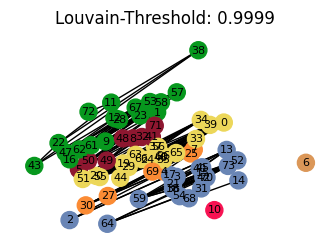

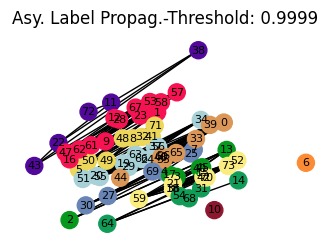

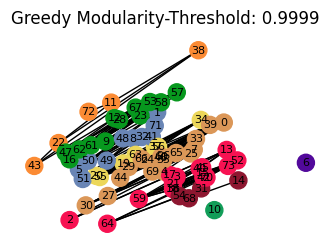

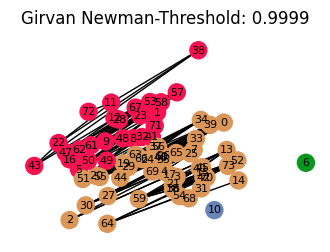

In [20]:
drawCommunities(G_9999, colors, algo_names, communities=communities_9999, threshold=0.9999, df=df, pos=pos_9999)

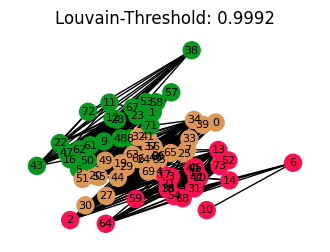

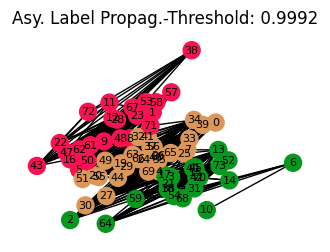

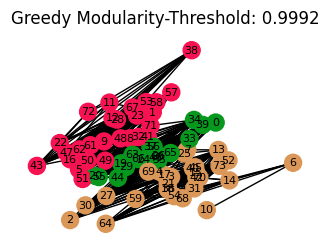

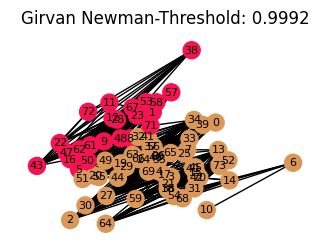

In [21]:
drawCommunities(G_9992, colors, algo_names, communities=communities_9992, threshold=0.9992, df=df, pos=pos_9992)

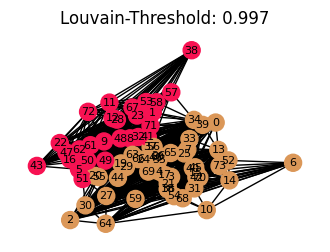

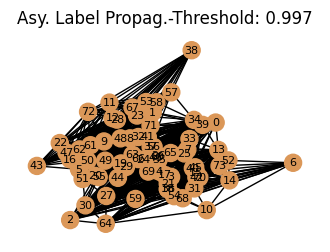

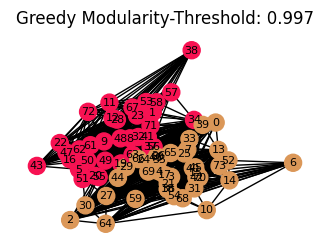

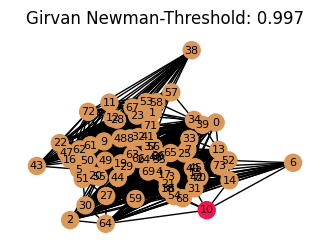

In [22]:
drawCommunities(G_997, colors, algo_names, communities=communities_997, threshold=0.997, df=df, pos=pos_997)

0.34539259259259264


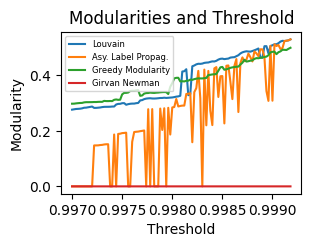

In [23]:
df_modularities = pd.DataFrame(columns=algo_names, dtype=float)
for threshold_times_10000 in range(99700, 100000, 2):
  threshold = threshold_times_10000 / 100000
  A = np.ones(similarities.shape, dtype=float)
  A[similarities < threshold] = 0
  A = A - np.identity(74)
  G = nx.from_numpy_array(A)
  communities_louvain = nx_comm.louvain_communities(G, seed=SEED, resolution=.5)
  communities_asyn_lpa = list(nx_comm.asyn_lpa_communities(G))
  communities_greedy_modularity = [set(x) for x in nx_comm.greedy_modularity_communities(G, best_n=74)]
  communities_girvan_newman = list([x for x in nx_comm.girvan_newman(G)][0])
  value = nx_comm.modularity(G, communities_girvan_newman)
  if value > 0:
    print(value)
    break
  df_modularities.loc[threshold] = [
    nx_comm.modularity(G, communities_louvain), nx_comm.modularity(G, communities_asyn_lpa),
    nx_comm.modularity(G, communities_greedy_modularity), value
  ]

df_modularities.plot.line(figsize=(figWidth, figHeight), xlabel='Threshold', ylabel='Modularity', title='Modularities and Threshold').legend(fontsize=6)